In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fp1 = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\data_f1db\\f1db-races-free-practice-1-results.csv')
fp2 = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\data_f1db\\f1db-races-free-practice-2-results.csv')
fp3 = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\data_f1db\\f1db-races-free-practice-3-results.csv')
fp4 = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\data_f1db\\f1db-races-free-practice-4-results.csv')

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\luker\AppData\Local\Temp\ipykernel_27712\4165127953.py:1: SyntaxWarning: invalid escape sequence '\l'
  fp1 = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\data_f1db\\f1db-races-free-practice-1-results.csv')
C:\Users\luker\AppData\Local\Temp\ipykernel_27712\4165127953.py:2: SyntaxWarning: invalid escape sequence '\l'
  fp2 = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\data_f1db\\f1db-races-free-practice-2-results.csv')
C:\Users\luker\AppData\Local\Temp\ipykernel_27712\4165127953.py:3: SyntaxWarning: invalid escape sequence '\l'
  fp3 = pd.read_csv('C:\\Users\

In [4]:
race_results = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\data_f1db\\f1db-races-race-results.csv')
starting_grid = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\data_f1db\\f1db-races-starting-grid-positions.csv')

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\luker\AppData\Local\Temp\ipykernel_27712\3925437359.py:1: SyntaxWarning: invalid escape sequence '\l'
  race_results = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\data_f1db\\f1db-races-race-results.csv')
C:\Users\luker\AppData\Local\Temp\ipykernel_27712\3925437359.py:2: SyntaxWarning: invalid escape sequence '\l'
  starting_grid = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\data_f1db\\f1db-races-starting-grid-positions.csv')
C:\Users\luker\AppData\Local\Temp\ipykernel_27712\3925437359.py:1: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  race_results = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\data_f1db\\f1db-races-race-results.csv')


In [5]:
position_difference = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\jaegeon\\race-position-difference.csv')

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\luker\AppData\Local\Temp\ipykernel_27712\4133993566.py:1: SyntaxWarning: invalid escape sequence '\l'
  position_difference = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\jaegeon\\race-position-difference.csv')


In [6]:
# Merge the two DataFrames
# Merging on raceId, year, round, driverNumber, and driverId
# Using suffixes to distinguish 'positionNumber' from each DataFrame
merged_df = pd.merge(
    race_results[['raceId', 'year', 'round', 'driverNumber', 'driverId', 'positionNumber']],
    starting_grid[['raceId', 'year', 'round', 'driverNumber', 'driverId', 'positionNumber']],
    on=['raceId', 'year', 'round', 'driverNumber', 'driverId'],
    how='left',
    suffixes=('_race_results', '_starting_grid')
)

# Calculate 'positionDifference'
# If either 'positionNumber_race_results' or 'positionNumber_starting_grid' is NaN,
# the result of the subtraction will automatically be NaN.
merged_df['positionDifference'] = merged_df['positionNumber_race_results'] - merged_df['positionNumber_starting_grid']

# Select the desired columns for the final DataFrame
final_df = merged_df[['raceId', 'year', 'round', 'driverId', 'positionDifference']]

# Save the final DataFrame to a CSV file
final_df.to_csv('race-positions-difference.csv', index=False)

In [7]:
grid_to_race = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\jaegeon\gridposition-result-difference.csv')

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\luker\AppData\Local\Temp\ipykernel_27712\3795699376.py:1: SyntaxWarning: invalid escape sequence '\l'
  grid_to_race = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\jaegeon\gridposition-result-difference.csv')


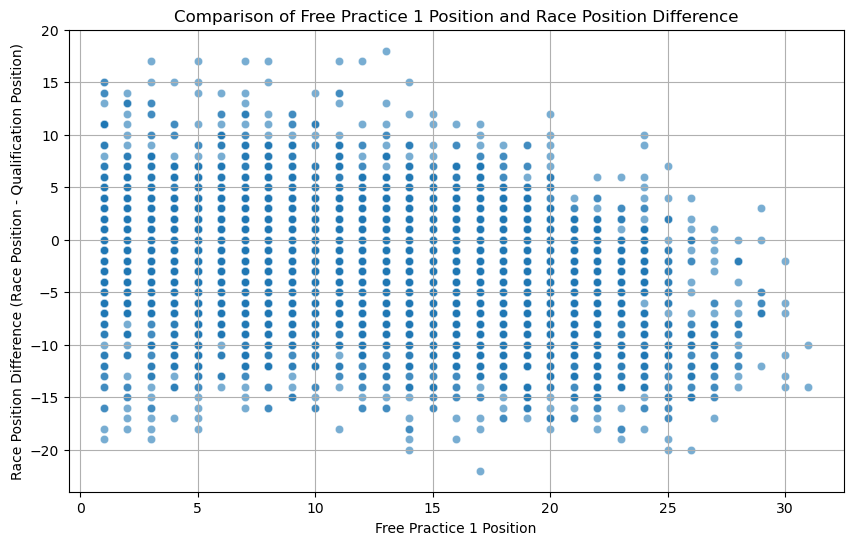

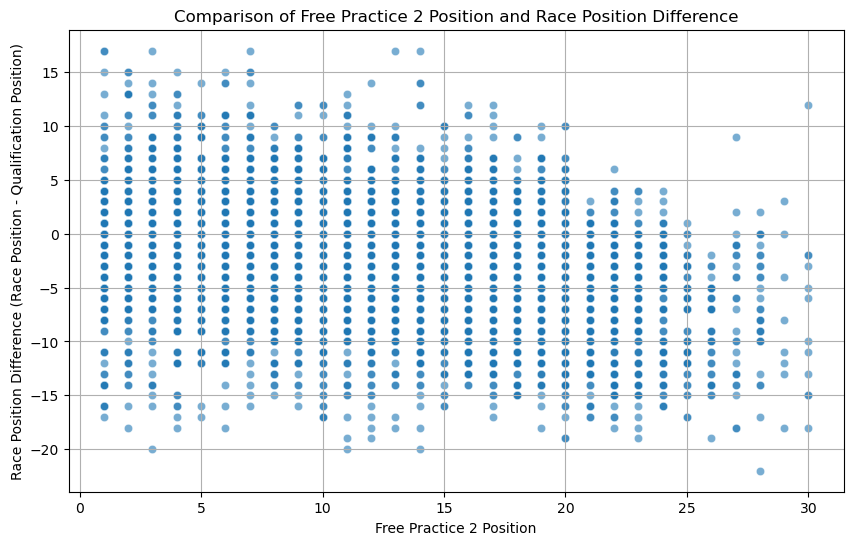

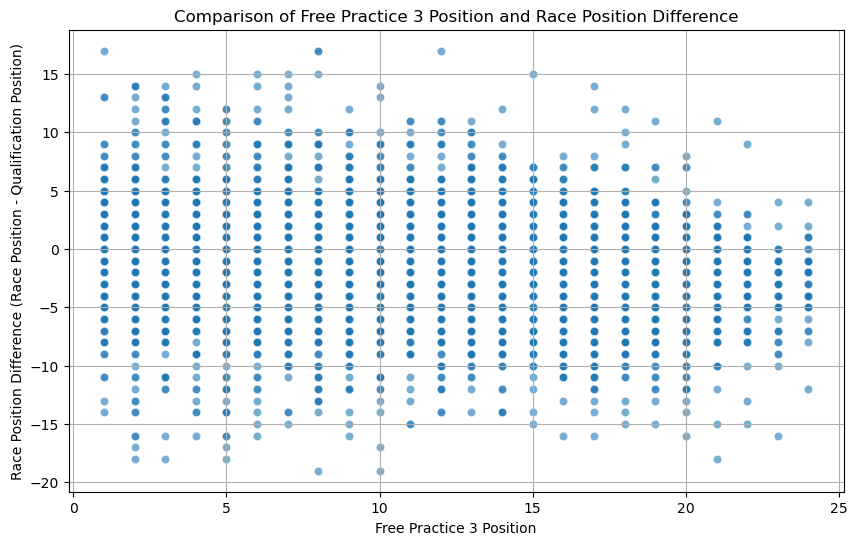

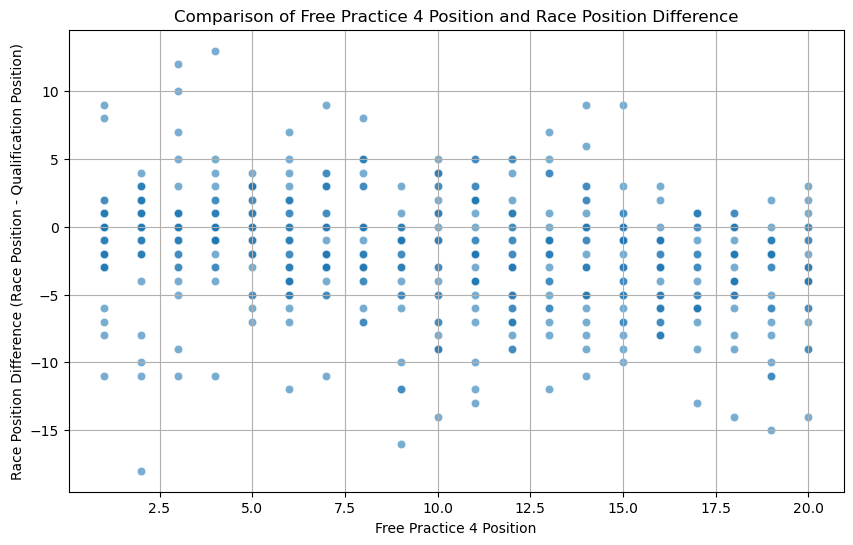

In [9]:
# List of free practice dataframes and their names for easy iteration
fp_dfs = {
    'Free Practice 1': fp1,
    'Free Practice 2': fp2,
    'Free Practice 3': fp3,
    'Free Practice 4': fp4
}

# Iterate through each free practice DataFrame, merge, and plot
for fp_name, fp_df in fp_dfs.items():
    # Merge with race_position_diff_df
    # Select relevant columns from fp_df before merging to avoid potential column name conflicts
    merged_fp_df = pd.merge(
        fp_df[['raceId', 'year', 'round', 'driverId', 'positionNumber']],
        grid_to_race[['raceId', 'year', 'round', 'driverId', 'positionDifference']],
        on=['raceId', 'year', 'round', 'driverId'],
        how='inner' # Use inner join to only include races/drivers present in both
    )

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=merged_fp_df,
        x='positionNumber',
        y='positionDifference',
        alpha=0.6
    )
    plt.title(f'Comparison of {fp_name} Position and Race Position Difference')
    plt.xlabel(f'{fp_name} Position')
    plt.ylabel('Race Position Difference (Race Position - Qualification Position)')
    plt.grid(True)
    plt.show()

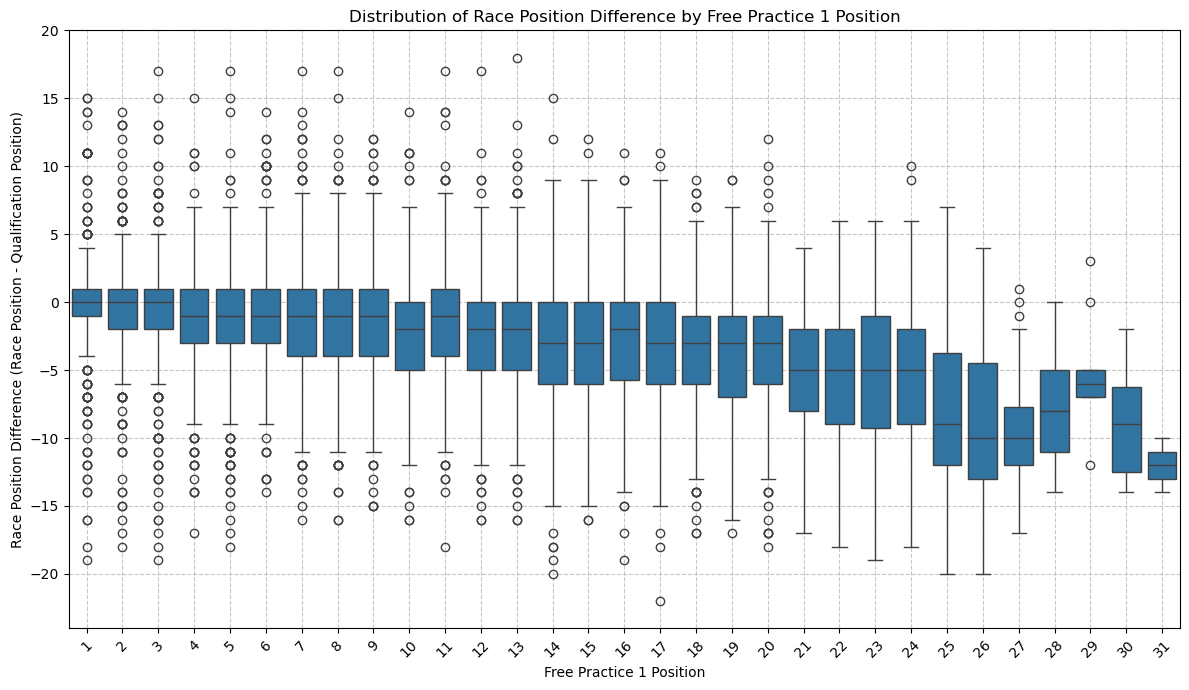

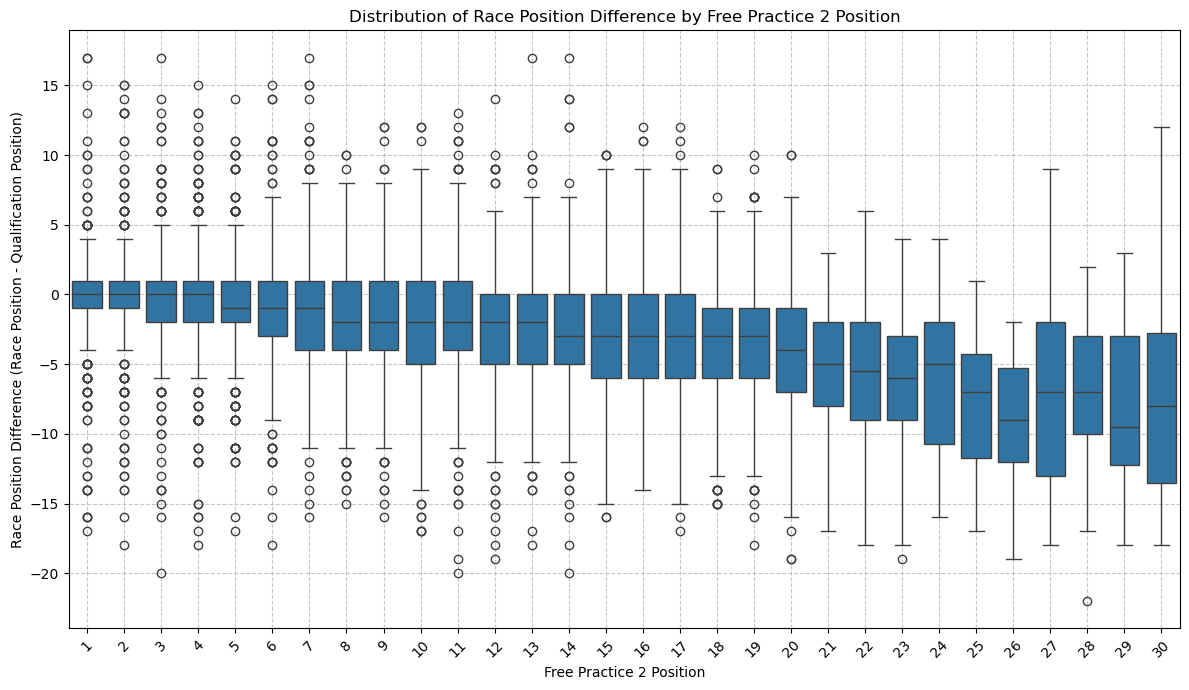

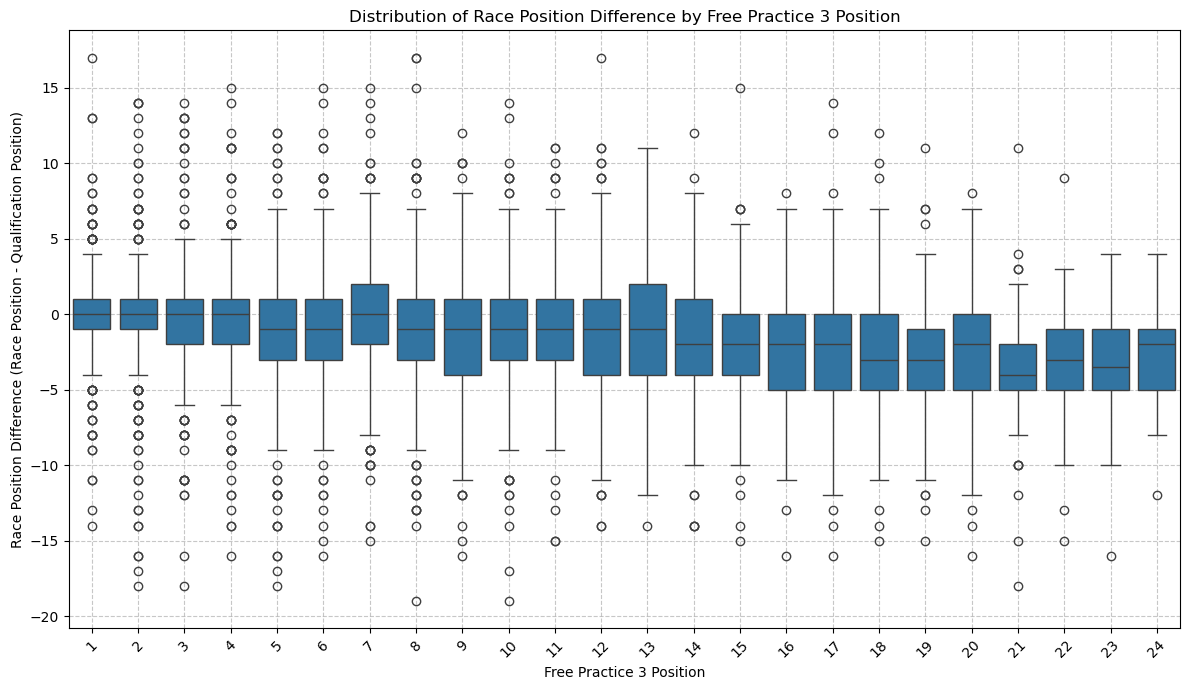

In [15]:
for fp_name, fp_df in fp_dfs.items():
    # Merge with race_position_diff_df
    # Select relevant columns from fp_df before merging to avoid potential column name conflicts
    merged_fp_df = pd.merge(
        fp_df[['raceId', 'year', 'round', 'driverId', 'positionNumber']],
        grid_to_race[['raceId', 'year', 'round', 'driverId', 'positionDifference']],
        on=['raceId', 'year', 'round', 'driverId'],
        how='inner' # Use inner join to only include races/drivers present in both
    )

    # Create the box and whisker plot
    plt.figure(figsize=(12, 7))
    sns.boxplot(
        data=merged_fp_df,
        x='positionNumber',
        y='positionDifference'
    )
    plt.title(f'Distribution of Race Position Difference by {fp_name} Position')
    plt.xlabel(f'{fp_name} Position')
    plt.ylabel('Race Position Difference (Race Position - Qualification Position)')
    plt.xticks(rotation=45) # Rotate x-axis labels if they are too crowded
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

In [13]:
qualifying = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\data_f1db\\f1db-races-qualifying-results.csv')

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\luker\AppData\Local\Temp\ipykernel_27712\1981131308.py:1: SyntaxWarning: invalid escape sequence '\l'
  qualifying = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\data_f1db\\f1db-races-qualifying-results.csv')


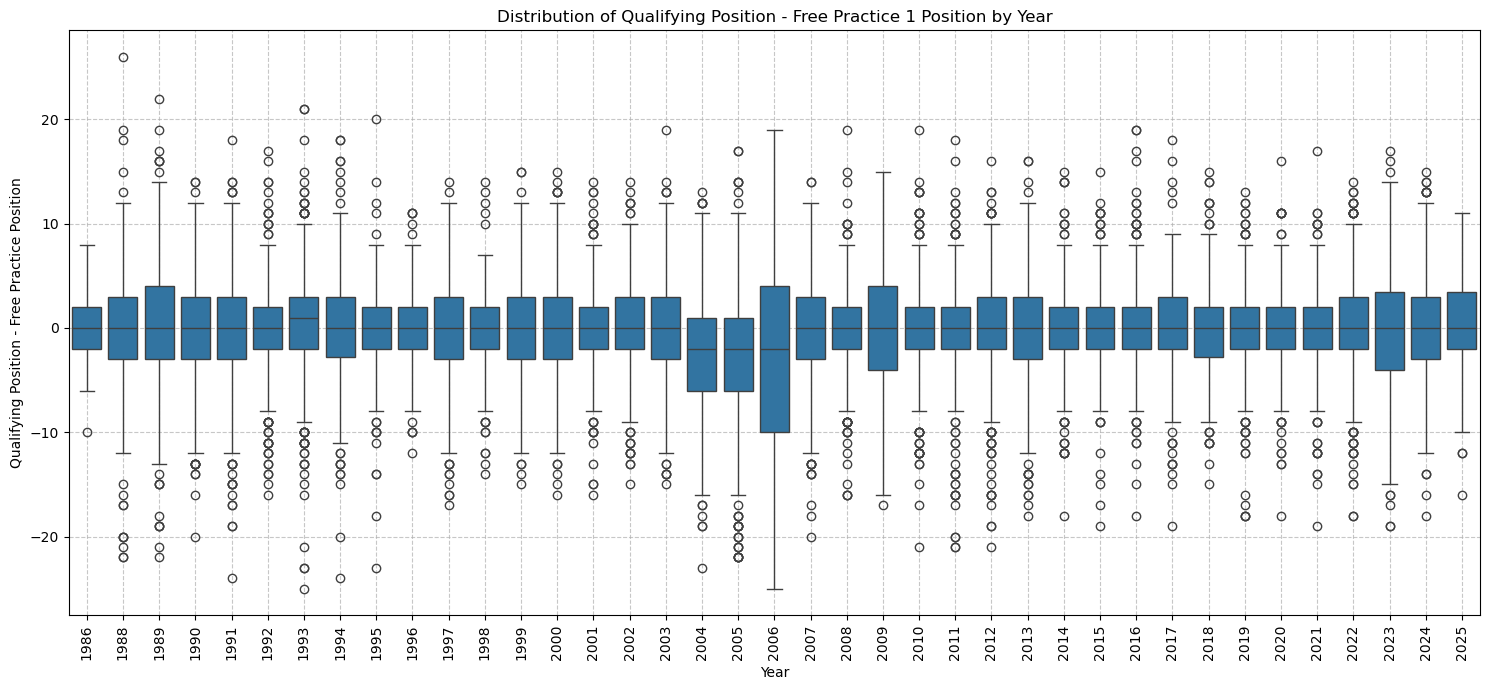

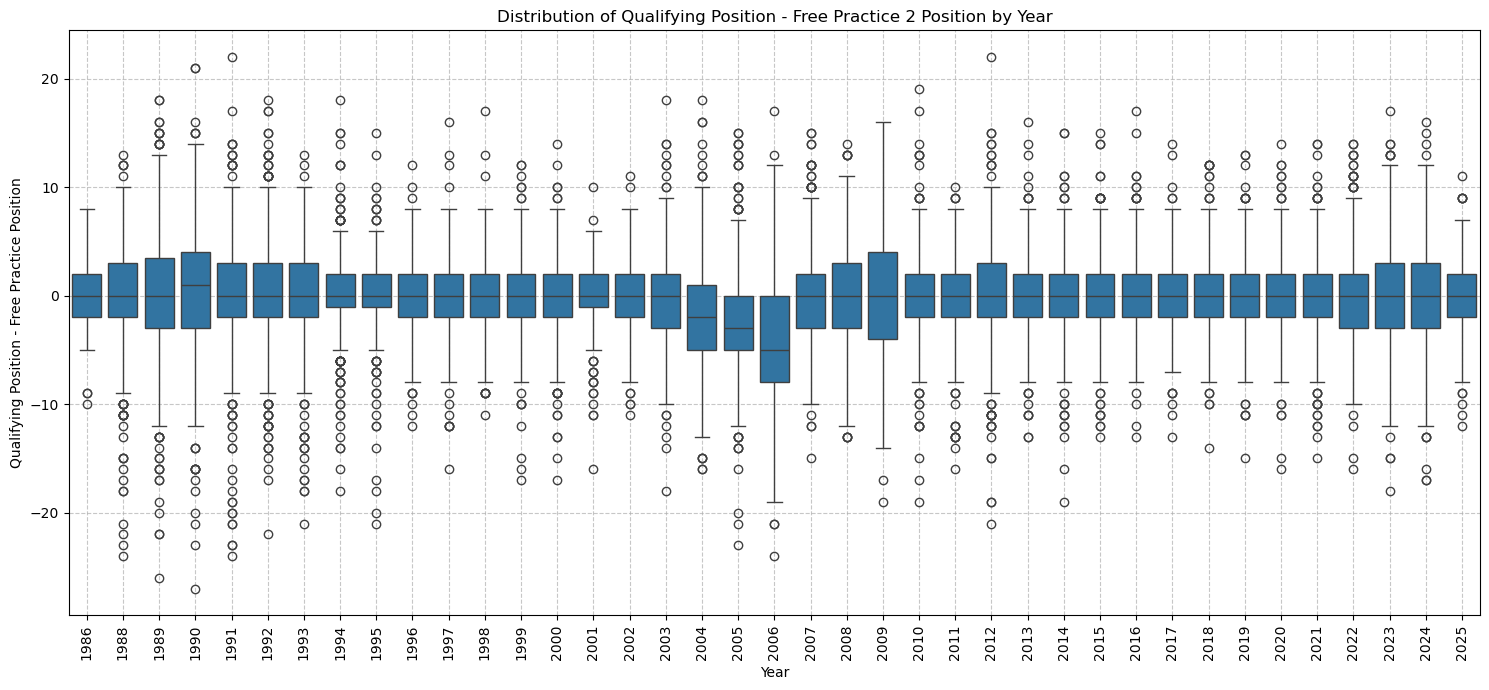

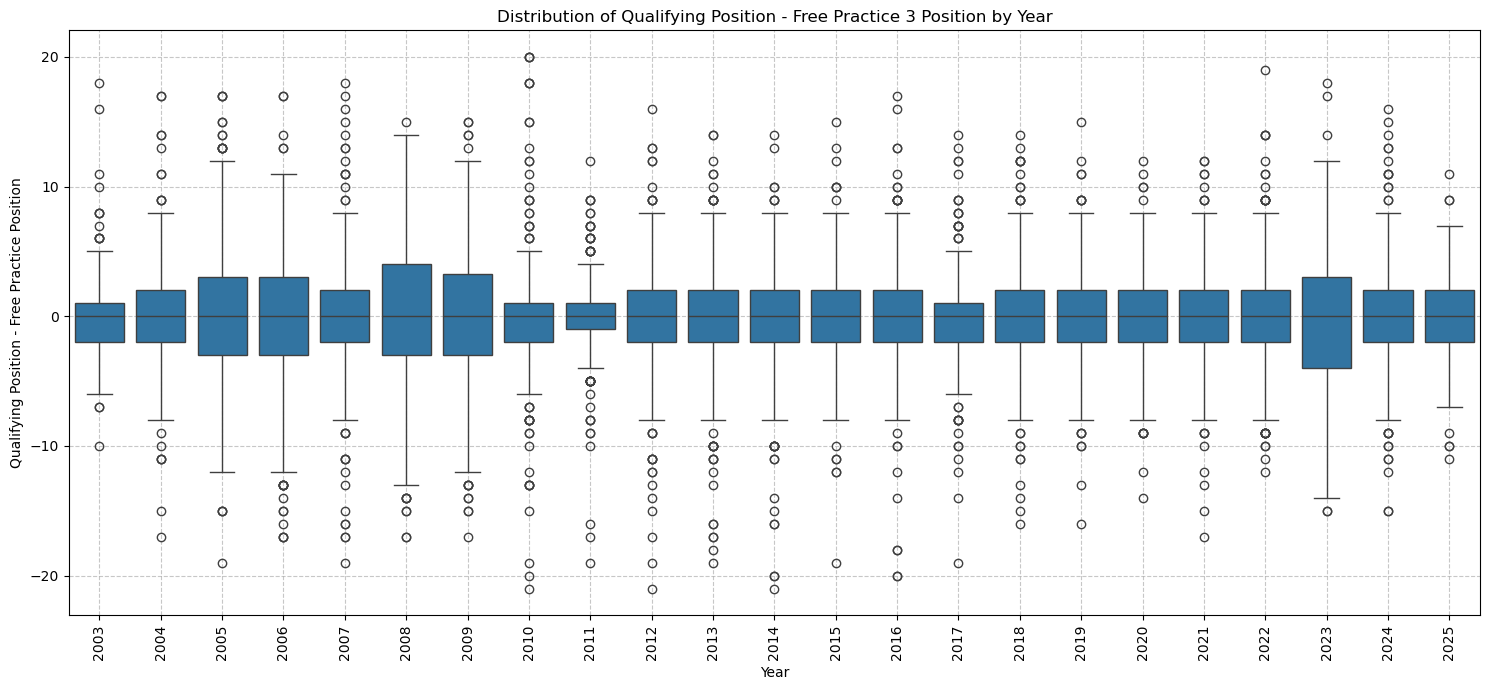

In [16]:
# Prepare qualifying data: select relevant columns and rename position column
qualifying_positions = qualifying[['raceId', 'year', 'round', 'driverId', 'positionNumber']].copy()
qualifying_positions.rename(columns={'positionNumber': 'qualifying_position'}, inplace=True)

# Dictionary of free practice dataframes and their names for easy iteration
fp_dfs = {
    'Free Practice 1': fp1,
    'Free Practice 2': fp2,
    'Free Practice 3': fp3
}

# Iterate through each free practice DataFrame, merge, calculate difference, and plot
for fp_name, fp_df in fp_dfs.items():
    # Prepare free practice data: select relevant columns and rename position column
    fp_positions = fp_df[['raceId', 'year', 'round', 'driverId', 'positionNumber']].copy()
    fp_positions.rename(columns={'positionNumber': 'fp_position'}, inplace=True)

    # Merge free practice and qualifying data
    # Inner join ensures we only compare for races/drivers present in both
    merged_df = pd.merge(
        fp_positions,
        qualifying_positions,
        on=['raceId', 'year', 'round', 'driverId'],
        how='inner'
    )

    # Calculate the new difference: qualifying position - free practice position
    merged_df['qualifying_fp_difference'] = merged_df['qualifying_position'] - merged_df['fp_position']

    # Drop rows where the difference is NaN (if either original position was NaN)
    merged_df.dropna(subset=['qualifying_fp_difference'], inplace=True)

    # Convert year to category for plotting, though seaborn handles int years well for boxplots
    merged_df['year'] = merged_df['year'].astype(str)

    # Create the box and whisker plot
    plt.figure(figsize=(15, 7))
    sns.boxplot(
        data=merged_df,
        x='year',
        y='qualifying_fp_difference',
        order=sorted(merged_df['year'].unique()) # Ensure years are in order
    )
    plt.title(f'Distribution of Qualifying Position - {fp_name} Position by Year')
    plt.xlabel('Year')
    plt.ylabel('Qualifying Position - Free Practice Position')
    plt.xticks(rotation=90) # Rotate x-axis labels for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\luker\AppData\Local\Temp\ipykernel_27712\540874935.py:1: SyntaxWarning: invalid escape sequence '\l'
  race_position_diff_df = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\jaegeon\gridposition-result-difference.csv')


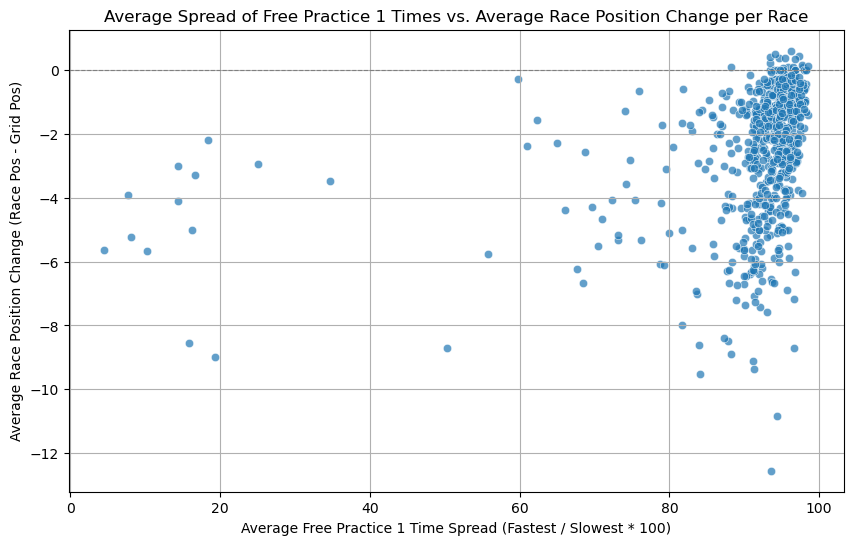

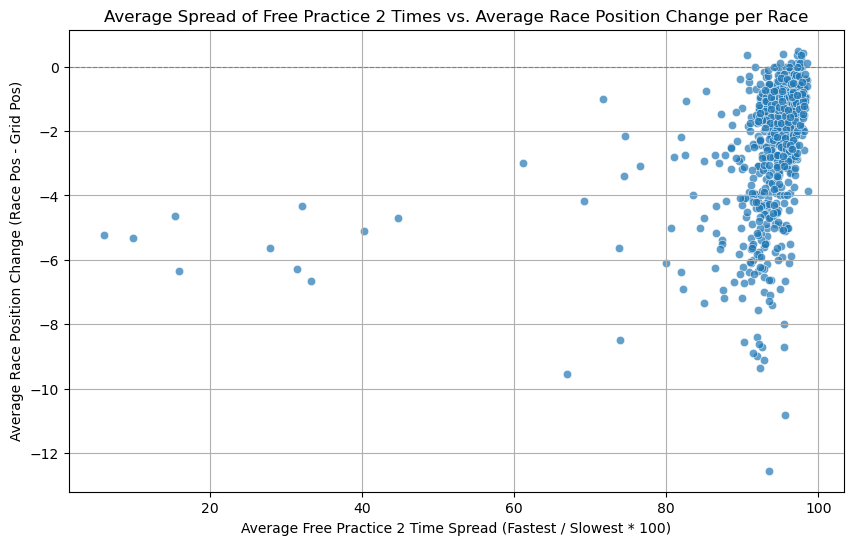

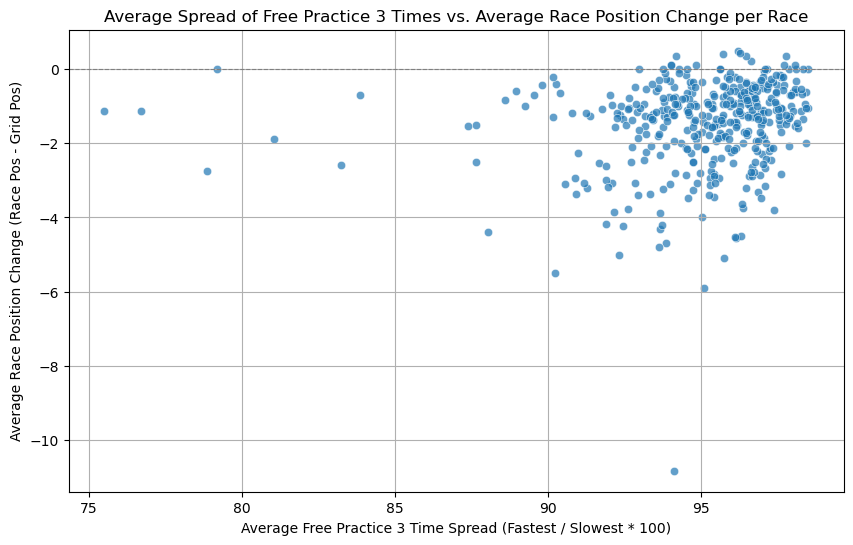

In [17]:
race_position_diff_df = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\jaegeon\gridposition-result-difference.csv')

# Group by raceId, year, round and calculate the mean of 'positionDifference'
avg_pos_change_per_race_df = race_position_diff_df.groupby(['raceId', 'year', 'round'])['positionDifference'].mean().reset_index()
avg_pos_change_per_race_df.rename(columns={'positionDifference': 'avg_pos_change'}, inplace=True)

# List of free practice dataframes and their names for easy iteration
fp_dfs = {
    'Free Practice 1': fp1,
    'Free Practice 2': fp2,
    'Free Practice 3': fp3
}

# C. Merge and Plot
for fp_name, fp_df in fp_dfs.items():
    # Calculate Fastest and Slowest Time per Race and the Spread
    fp_race_times = fp_df.groupby(['raceId', 'year', 'round'])['timeMillis'].agg(
        min_timeMillis='min',
        max_timeMillis='max'
    ).reset_index()

    # Calculate spread: (fastest time / slowest time * 100)
    fp_race_times['fp_spread'] = (fp_race_times['min_timeMillis'] / fp_race_times['max_timeMillis']) * 100

    # Merge with the average position change data
    merged_plot_df = pd.merge(
        fp_race_times[['raceId', 'year', 'round', 'fp_spread']],
        avg_pos_change_per_race_df,
        on=['raceId', 'year', 'round'],
        how='inner' # Only include races where both data types are available
    )

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=merged_plot_df,
        x='fp_spread',
        y='avg_pos_change',
        alpha=0.7
    )
    plt.title(f'Average Spread of {fp_name} Times vs. Average Race Position Change per Race')
    plt.xlabel(f'Average {fp_name} Time Spread (Fastest / Slowest * 100)')
    plt.ylabel('Average Race Position Change (Race Pos - Grid Pos)')
    plt.grid(True)
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Add a line at y=0 for reference
    plt.show()